In [2]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("tips.csv", encoding='latin1')

In [4]:
df

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True
...,...,...,...,...,...,...,...,...,...,...
38243,38244,605,Tipster E1,02/04/2016,Kempton,Solar Flair,Win,7.00,Lose,False
38244,38245,606,Tipster E1,02/04/2016,Doncaster,Express Himself,Each Way,12.00,Lose,False
38245,38246,607,Tipster E1,02/04/2016,Doncaster,Jack Dexter,Win,7.00,Lose,False
38246,38247,608,Tipster E1,02/04/2016,Kelso,Just Cameron,Win,4.33,Lose,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38248 entries, 0 to 38247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UID            38248 non-null  int64  
 1   ID             38248 non-null  int64  
 2   Tipster        38248 non-null  object 
 3   Date           38248 non-null  object 
 4   Track          38248 non-null  object 
 5   Horse          38248 non-null  object 
 6   Bet Type       38248 non-null  object 
 7   Odds           38248 non-null  float64
 8   Result         38248 non-null  object 
 9   TipsterActive  38248 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [6]:
df.describe()

,UID,ID,Odds
count,38248.000000,38248.000000,38248.000000
mean,19124.500000,1013.308251,10.994968
std,11041.390885,917.941098,11.004589
min,1.000000,1.000000,1.070000
25%,9562.750000,318.000000,5.000000
50%,19124.500000,749.000000,8.000000
75%,28686.250000,1419.000000,13.000000
max,38248.000000,4383.000000,407.000000


In [7]:
df.isnull().sum()

UID              0
ID               0
Tipster          0
Date             0
Track            0
Horse            0
Bet Type         0
Odds             0
Result           0
TipsterActive    0
dtype: int64

In [8]:
df1=df[['Tipster','Track','Horse','Bet Type','Odds','Result','TipsterActive']]

In [9]:
df2=df1
from sklearn.preprocessing import LabelEncoder
for c in df2.columns:
    if df2[c].dtype=='object':
        df2[c] = df2[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df2[c].values))
        df2[c] = lbl.transform(df2[c].values)

C:\Users\aryal\AppData\Local\Temp\ipykernel_17920\1512441712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = df2[c].fillna('N')
C:\Users\aryal\AppData\Local\Temp\ipykernel_17920\1512441712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[c] = lbl.transform(df2[c].values)
C:\Users\aryal\AppData\Local\Temp\ipykernel_17920\1512441712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [10]:
df2 = df1
df1

,Tipster,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,0,2,5158,1,8.00,0,True
1,0,96,13108,1,4.50,0,True
2,0,114,13411,1,7.00,0,True
3,0,74,8976,1,5.00,0,True
4,0,2,10554,1,4.33,1,True
...,...,...,...,...,...,...,...
38243,9,54,12946,1,7.00,0,False
38244,9,26,4591,0,12.00,0,False
38245,9,26,6824,1,7.00,0,False
38246,9,53,7068,1,4.33,0,False


In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df1.copy()

# Initialize LabelEncoder
lbl = LabelEncoder()

# Fill missing values with 'N'
df_encoded['TipsterActive'] = df_encoded['TipsterActive']
# Fit and transform the 'TipsterActive' column
df_encoded['TipsterActive'] = lbl.fit_transform(df_encoded['TipsterActive'])

# Display the encoded DataFrame
print(df_encoded.head())


   Tipster  Track  Horse  Bet Type  Odds  Result  TipsterActive
0        0      2   5158         1  8.00       0              1
1        0     96  13108         1  4.50       0              1
2        0    114  13411         1  7.00       0              1
3        0     74   8976         1  5.00       0              1
4        0      2  10554         1  4.33       1              1


In [12]:
# Identify and removing outliers
# Calculate Z-scores for each feature
z_scores = stats.zscore(df_encoded)

# Define threshold for Z-score
threshold = 3

# Filter out rows where any feature has a Z-score higher than the threshold
df_encoded = df_encoded[(np.abs(z_scores) < threshold).all(axis=1)]

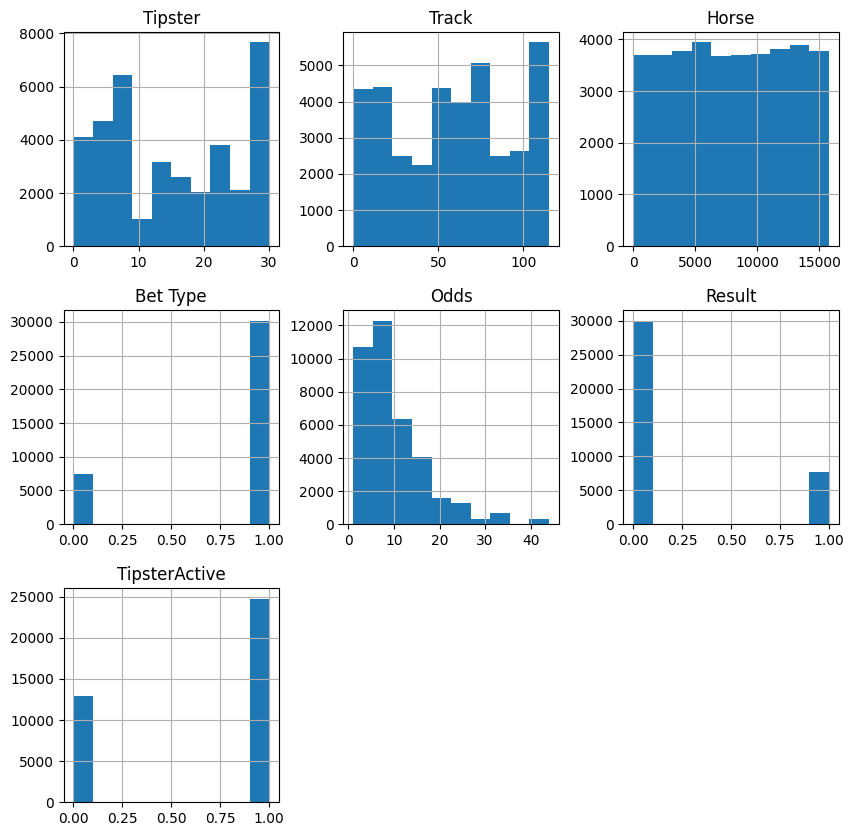

In [13]:
df_encoded.iloc[:,:].hist(figsize=(10,10))
plt.show()

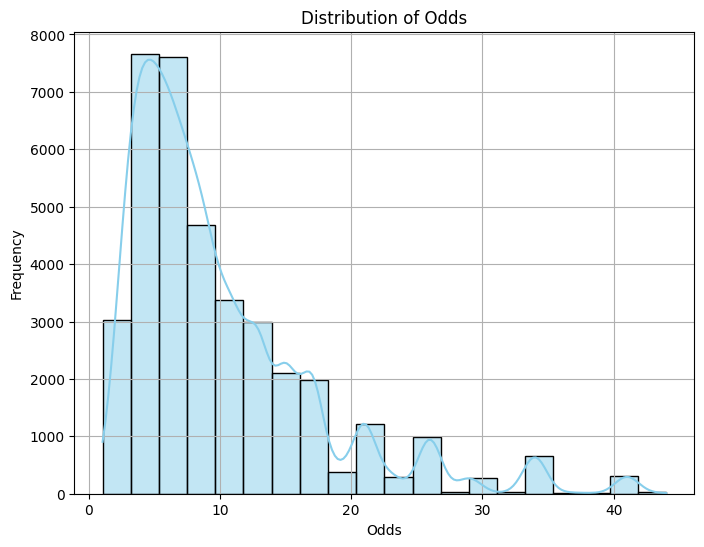

C:\Users\aryal\AppData\Local\Temp\ipykernel_17920\3090088935.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y='Odds', data=df_encoded, palette='pastel')


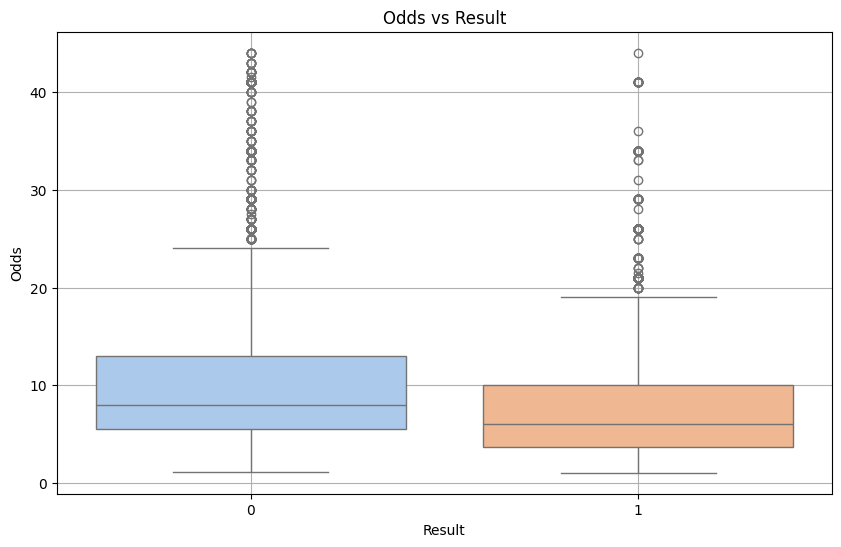

In [14]:
# Histogram of 'Odds'
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['Odds'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of 'Odds' vs 'Result'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='Odds', data=df_encoded, palette='pastel')
plt.title('Odds vs Result')
plt.xlabel('Result')
plt.ylabel('Odds')
plt.grid(True)
plt.show()


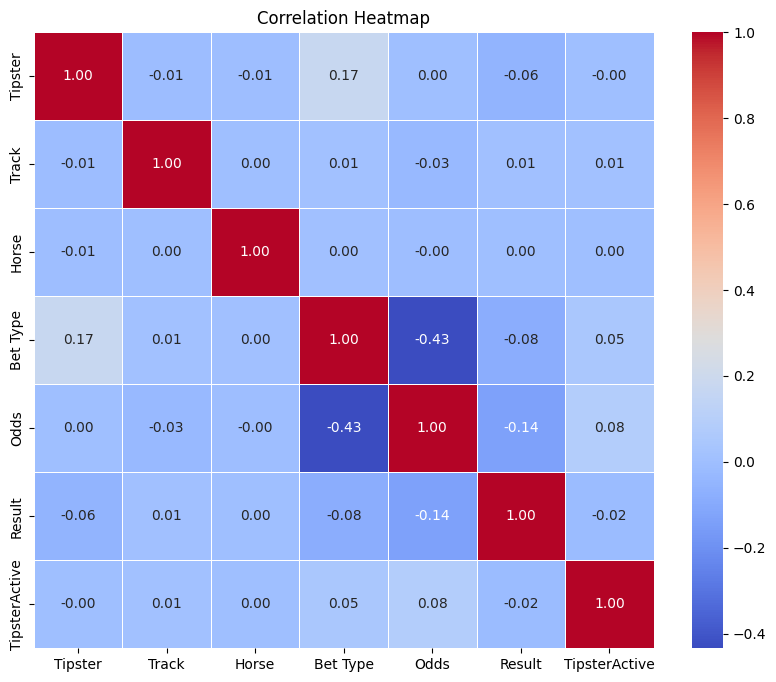

In [15]:
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['Result'])  # Features are all columns except 'Result'
y = df_encoded['Result']  # Target variable is 'Result'


In [17]:
# Display the first few rows of the features
print("Features (X):")
print(X.head())

# Display the first few rows of the target variable
print("\nTarget Variable (y):")
print(y.head())

Features (X):
   Tipster  Track  Horse  Bet Type  Odds  TipsterActive
0        0      2   5158         1  8.00              1
1        0     96  13108         1  4.50              1
2        0    114  13411         1  7.00              1
3        0     74   8976         1  5.00              1
4        0      2  10554         1  4.33              1

Target Variable (y):
0    0
1    0
2    0
3    0
4    1
Name: Result, dtype: int32


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (26368, 6) (26368,)
Testing set shape: (11301, 6) (11301,)


In [19]:
headers = X.columns

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train,columns=headers).head()

,Tipster,Track,Horse,Bet Type,Odds,TipsterActive
9940,14,74,15750,1,10.0,1
30556,1,59,10800,1,4.5,1
1204,0,19,4208,1,2.5,1
27482,28,113,1883,1,17.0,1
24959,28,2,10294,1,8.0,1


In [21]:
X_train_scaled

array([[-0.07427859,  0.46705287,  1.71411144,  0.49866042, -0.01241539,
         0.71925013],
       [-1.40212805,  0.03723922,  0.62876998,  0.49866042, -0.75798873,
         0.71925013],
       [-1.50427032, -1.10893054, -0.81659788,  0.49866042, -1.02910631,
         0.71925013],
       ...,
       [-0.07427859, -1.19489327,  0.54281971, -2.00537271,  0.1231434 ,
         0.71925013],
       [-1.50427032,  0.95417502, -0.84290918, -2.00537271, -0.14797418,
         0.71925013],
       [ 0.538575  , -1.45278146,  0.60596685,  0.49866042, -0.75798873,
         0.71925013]])

In [22]:
X_test_scaled

array([[-1.09570125, -1.10893054, -1.18166727, -2.00537271,  0.25870219,
        -1.3903369 ],
       [ 1.25357086,  1.52725989,  0.69827569,  0.49866042, -0.41909176,
        -1.3903369 ],
       [-0.58498992,  0.72494107,  1.690212  , -2.00537271,  1.47873129,
        -1.3903369 ],
       ...,
       [ 0.2321482 ,  0.23781892, -1.17574723, -2.00537271, -0.01241539,
         0.71925013],
       [-1.40212805,  0.61032409,  0.74432048,  0.49866042, -0.89354752,
         0.71925013],
       [-1.19784352,  0.40974438,  0.45226496,  0.49866042, -0.08019479,
        -1.3903369 ]])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
print(acc_log)
# 4. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

79.71
Accuracy: 0.7968321387487833


C:\Users\aryal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy
print("Decision Tree Accuracy:", accuracy_dt)



Decision Tree Accuracy: 0.6978143527121494


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7747986903813822
